In [3]:
#autoreload
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
from model import *
from viz import *
from dataset import *
from data import *

In [5]:
df = load_tload('data/buildings/datasets/2024/GATES_zone-tloads.csv')
weather = load_weather('data/buildings/datasets/2024/weather.csv')

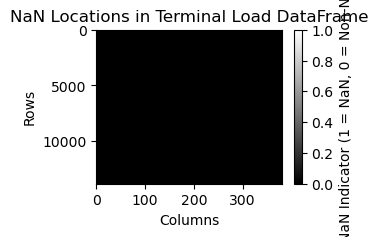

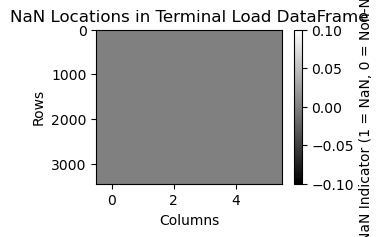

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [6]:
nan_viz(df)
nan_viz(weather)

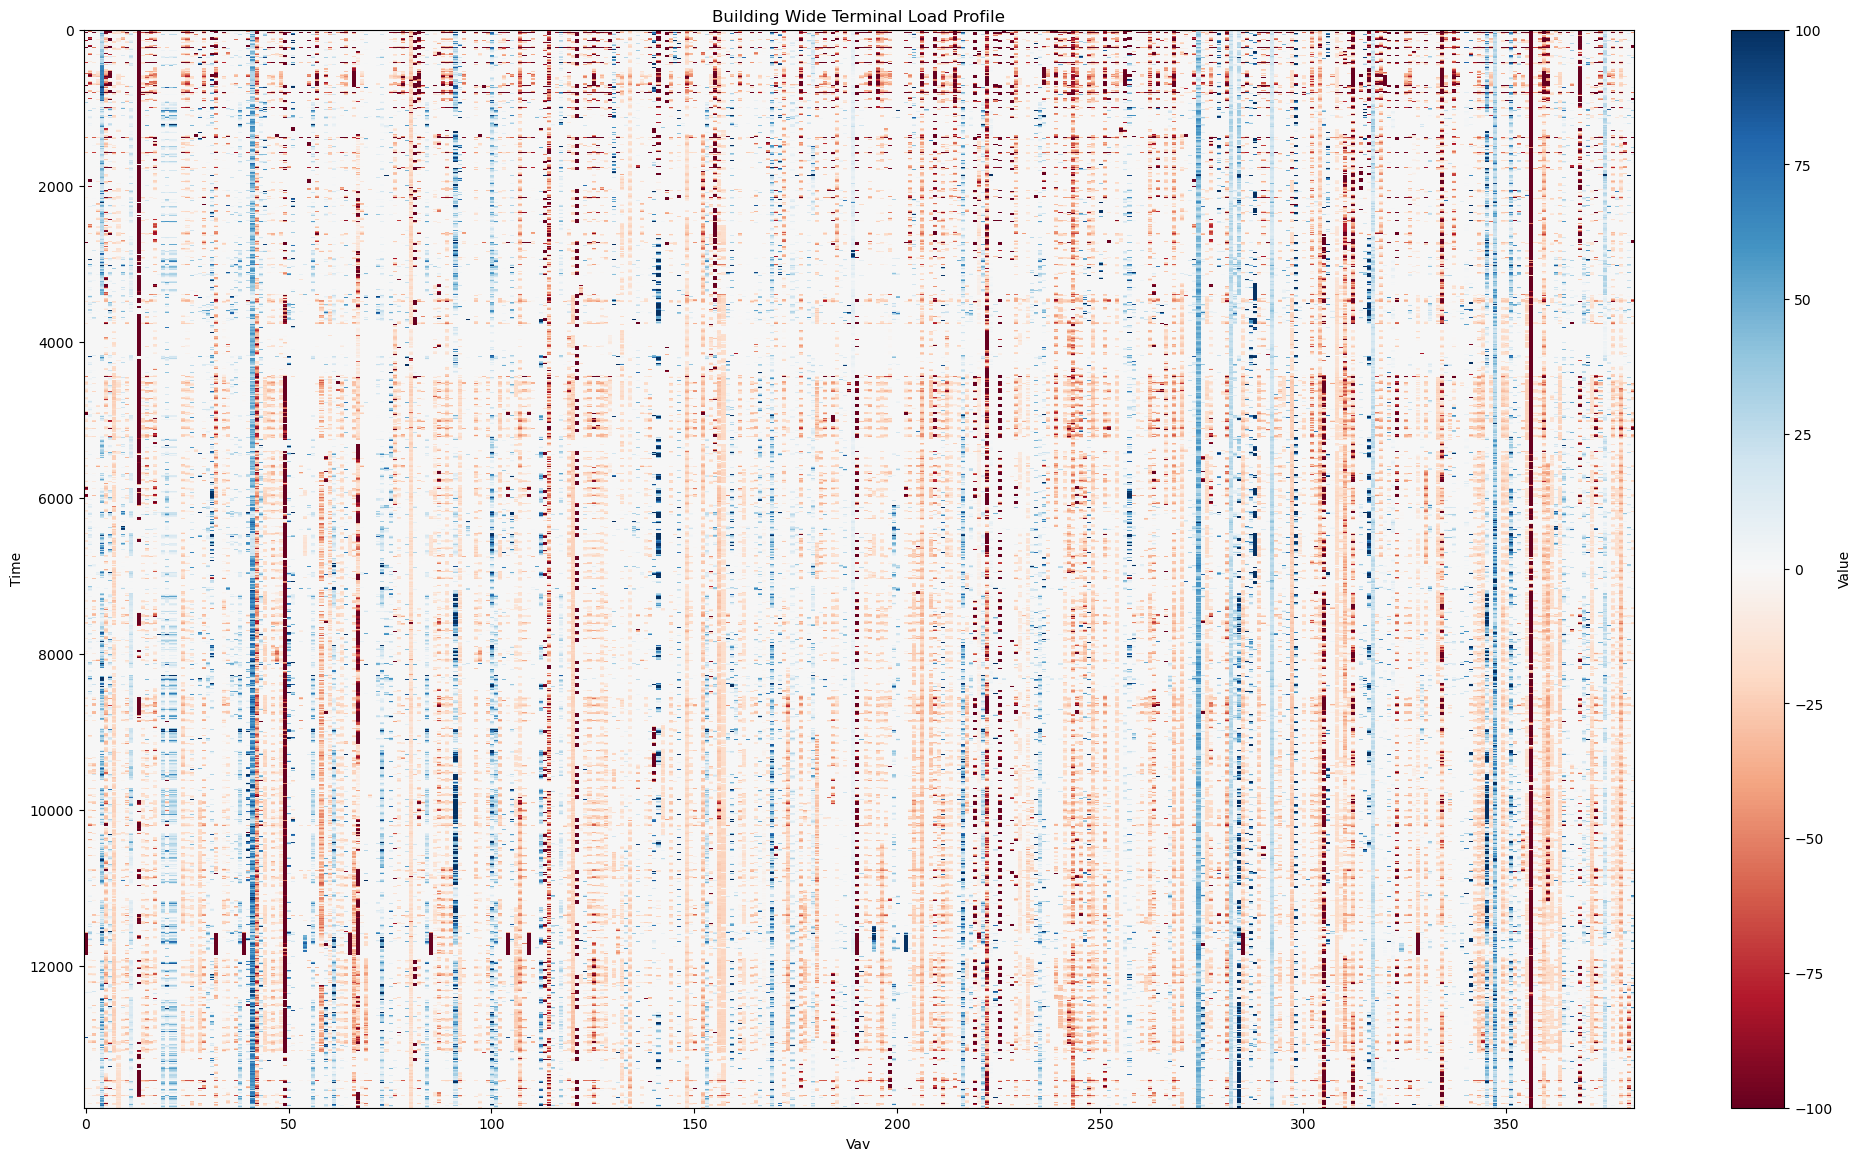

In [7]:
tload_viz(df)

We have time series for a given building, corresponding do each zone terminal load, a measure of how needy a zone i in term of cooling or reheat. 

We'll denote this:

$$T_{load}^{(z,t)}$$

With $t$ indexing the time and $z$ denoting the zone of the building. We have  382  zone in this building, which makes a vector of 
$$T_{load, building}^{t} \in \mathbb R ^{(382,1)}$$

We also have a input feature timeseries, which is common for all the building as well. This includes features such as Outside Air temperautre or solar irradiation. 

$$W^{t}$$

In the code the weather dataframe is formatted like so:
| Date                | temperature | RH  | Tdew | wind | sun_rad | daily_rain |
|---------------------|-------------|-----|------|------|---------|------------|
| 2023-05-01 00:00:00 | 52.6        | 75.0| 44.8 | 9.2  | 0.0     | 0.00       |
| 2023-05-01 01:00:00 | 52.4        | 75.0| 44.7 | 7.4  | 0.0     | 0.00       |
| 2023-05-01 02:00:00 | 52.2        | 75.0| 44.4 | 9.0  | 0.0     | 0.00       |

And the 

| Date                | VAV2-33 | VAV2-17   | VAV3-18 | VAV4-22    | VAV2-20 | VAV1-18 | VAV2-03   | VAV3-06 | VAV2-31 | VAV2-29 | ... | VAV2-11 | VAV2-32 | VAV4-25    | VAV4-08 | VAV1-02   | VAV0-00-4  | VAV0-04 | VAV1-12 | VAV2-18 | VAV3-15 |
|---------------------|---------|-----------|---------|------------|---------|---------|-----------|---------|---------|---------|-----|---------|---------|------------|---------|-----------|------------|---------|---------|---------|---------|
| 2023-05-01 00:00:00 | 0.0     | 0.000000  | 0.0     | -10.687083 | 0.0     | 0.0     | -5.494500 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.662916 | 0.0     | -0.435333 | -8.518917  | 0.0     | 0.0     | 0.0     | 0.000000|
| 2023-05-01 01:00:00 | 0.0     | -0.355917 | 0.0     | -10.881667 | 0.0     | 0.0     | -7.798417 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.492833 | 0.0     | -7.894917 | -7.576250  | 0.0     | 0.0     | 0.0     | 0.000000|
| 2023-05-01 02:00:00 | 0.0     | -0.559250 | 0.0     | -10.827083 | 0.0     | 0.0     | -6.123417 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.670916 | 0.0     | -6.497750 | -8.176333  | 0.0     | 0.0     | 0.0     | -1.364750|

I want to train a LSTM architecture that will for an input of the past 2 weeks of data of terminal load vector, will try to predict the next week. I also have the exact weather for the two past weeks and the predicting wek (that could be a forcecast in real life use), to help the prediction of model, as those should be correlated in some ways. 

Give me a way to start formatting my code to have such a model, train it and test it. I want to have september has my validation set. 


# Quick look at the data

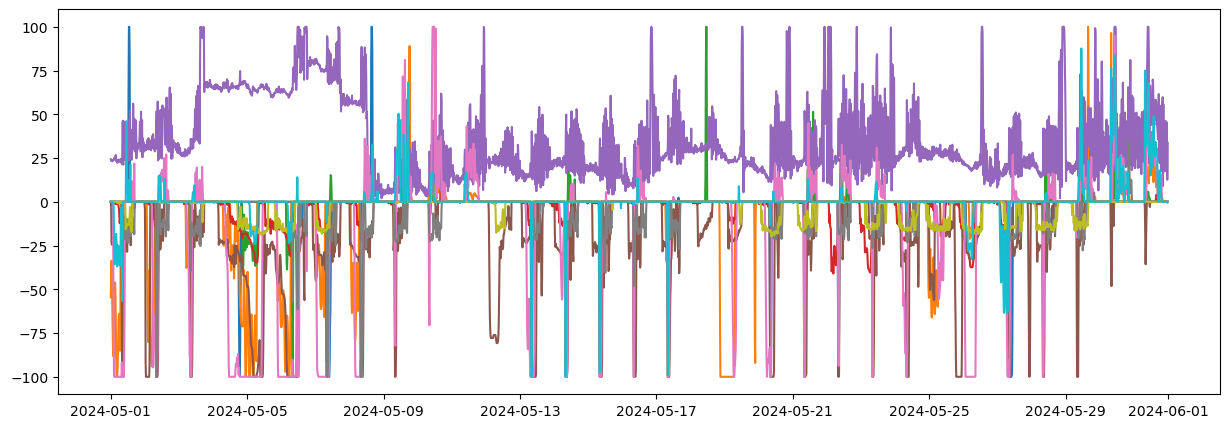

In [7]:
plt.figure(figsize=(15,5))
for col in df.columns[:10]:
    plt.plot(df.loc[df.index.month == 5,col], label=col)

# Hyperparameters choice

In [8]:
n_epochs = 400 

# Base model

In [9]:
# Make sure both dataframes have datetime indices
df.index = pd.to_datetime(df.index)
weather.index = pd.to_datetime(weather.index)

# Train the model
model, train_losses, val_losses, train_dataset, val_dataset, train_loader, val_loader = get_trained_model(df, weather, n_epochs=n_epochs)

Checking data availability...
Terminal loads date range: 2024-04-29 00:00:00 to 2024-09-19 23:45:00
Weather data date range: 2024-04-29 00:00:00 to 2024-09-19 23:00:00

Using split date: 2024-08-21 00:00:00

Checking data sizes:
Training set hours: 10944
Validation set hours: 2880
Minimum required hours: 216

Creating datasets...
Created 105 valid sequences
First sequence shapes:
Past terminal load and weather: (168, 388)
Future weather: (48, 6)
Target loads: (48, 382)
Created 22 valid sequences
First sequence shapes:
Past terminal load and weather: (168, 388)
Future weather: (48, 6)
Target loads: (48, 382)

Creating dataloaders...

Initializing model...

Starting training...
Training on device: mps
Number of training batches: 4
Number of validation batches: 1
Epoch [5/400], Train Loss: 0.8292, Val Loss: 0.9717
Epoch [10/400], Train Loss: 0.7449, Val Loss: 0.8775
Epoch [15/400], Train Loss: 0.7770, Val Loss: 0.8574
Epoch [20/400], Train Loss: 0.6552, Val Loss: 0.8509
Epoch [25/400], Tr

# Saving the models

# Loading the model

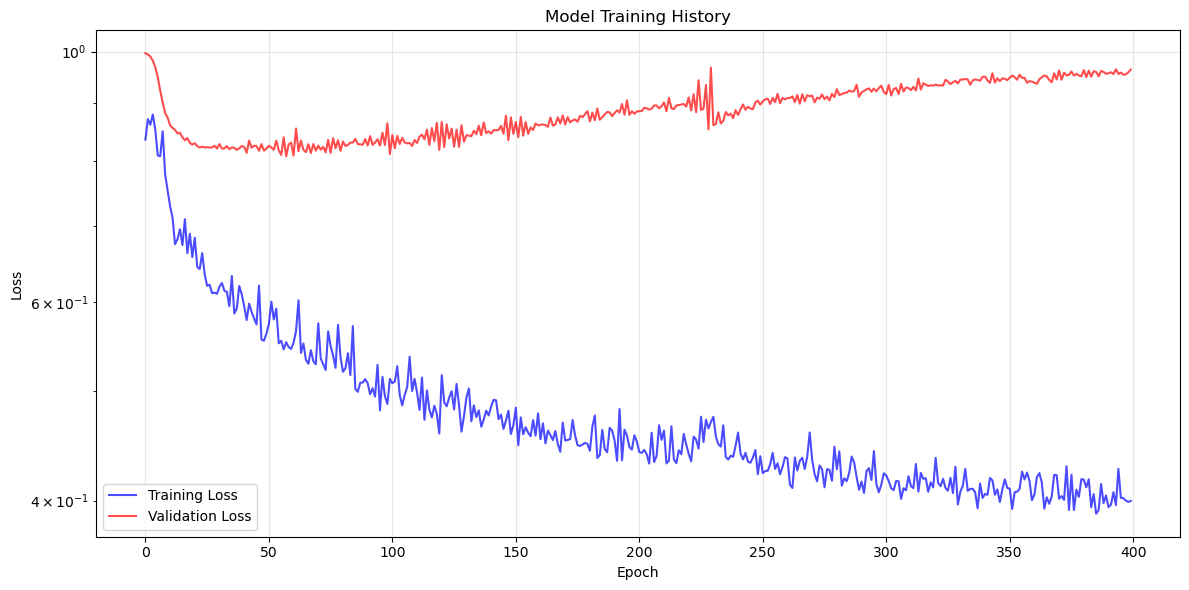

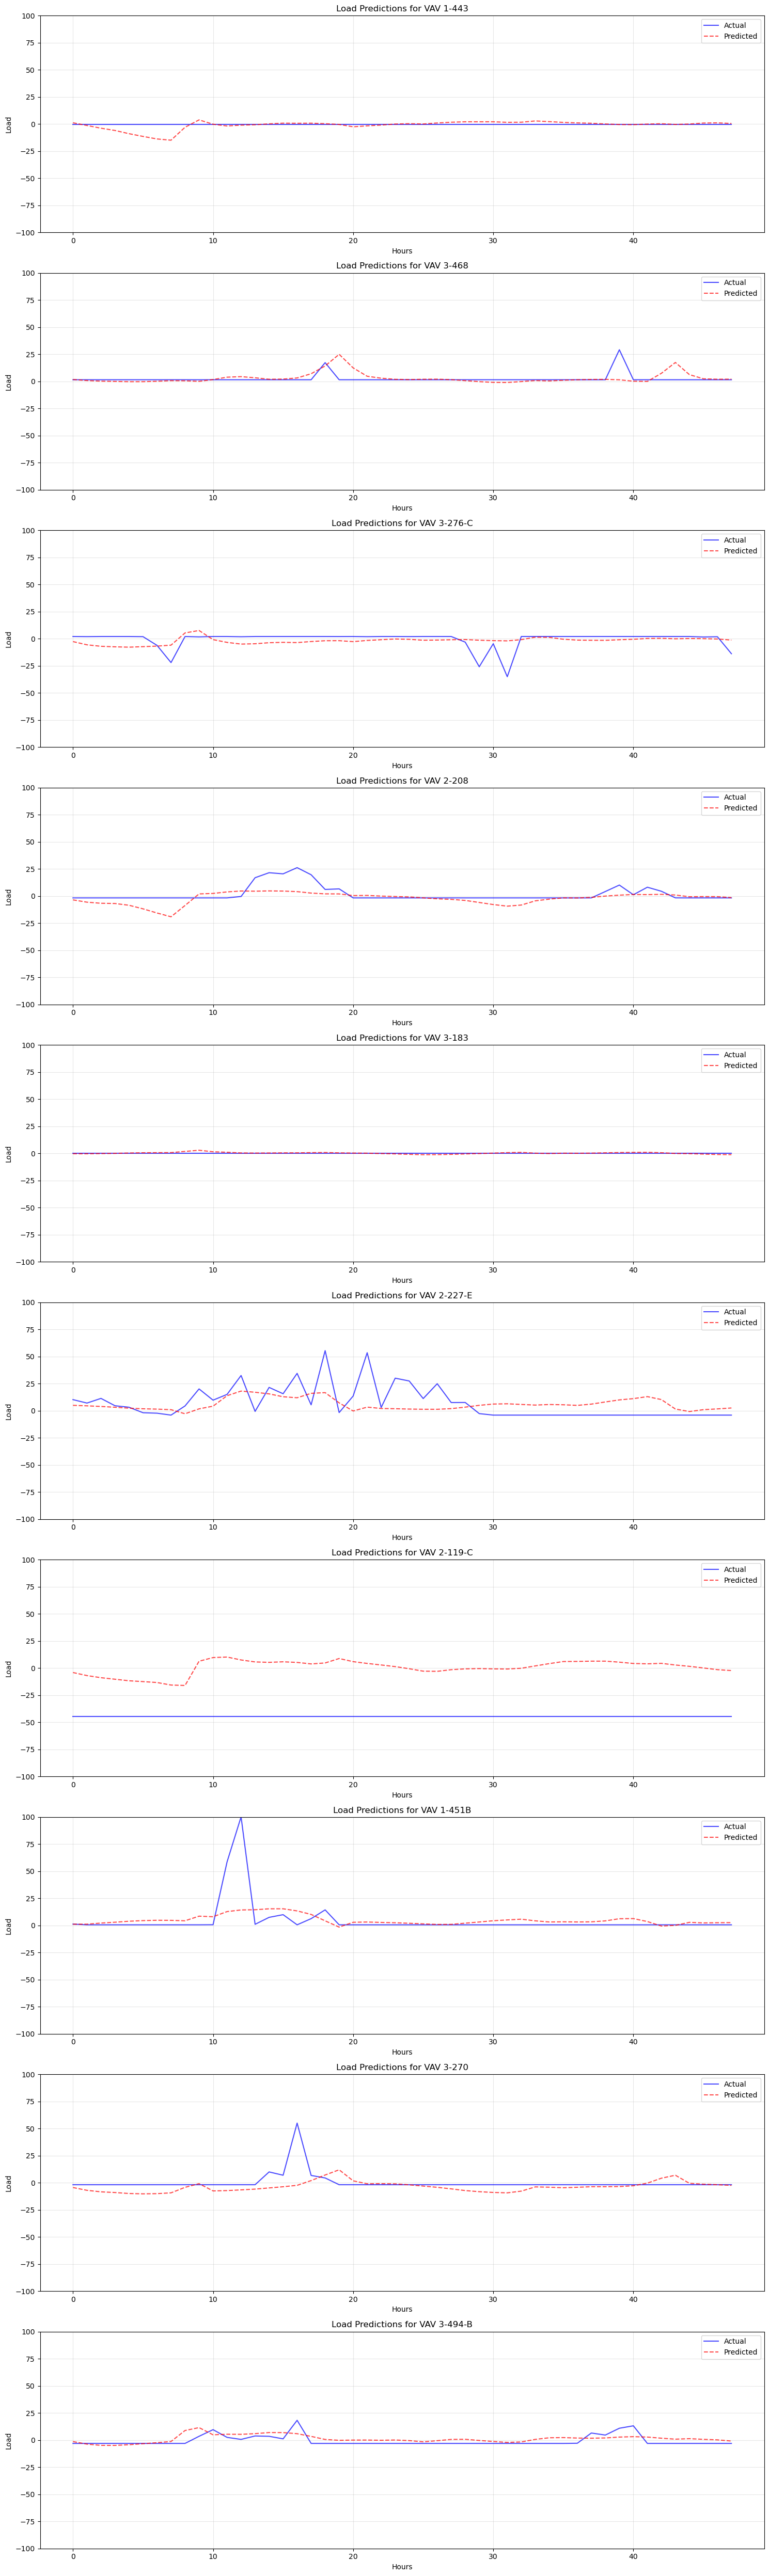

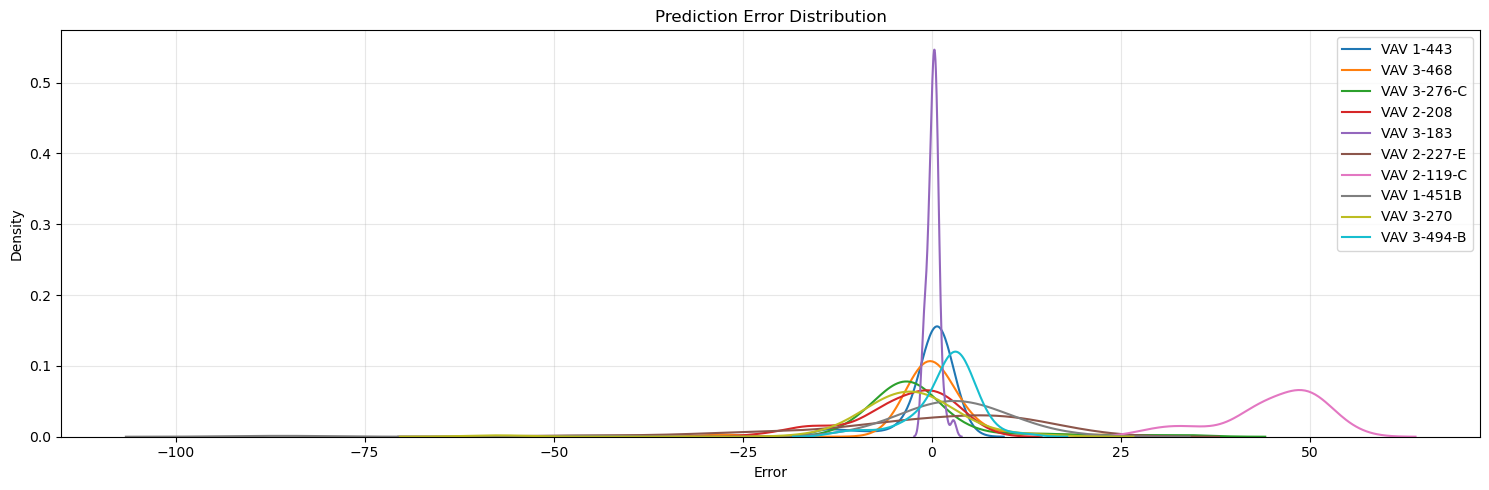


Prediction Metrics:
--------------------------------------------------

VAV 1-443:
MAPE: 820.18%
RMSE: 3.92

VAV 3-468:
MAPE: 156.82%
RMSE: 6.24

VAV 3-276-C:
MAPE: 187.28%
RMSE: 7.97

VAV 2-208:
MAPE: 209.67%
RMSE: 7.52

VAV 3-183:
MAPE: 1305.63%
RMSE: 0.80

VAV 2-227-E:
MAPE: 216.17%
RMSE: 14.61

VAV 2-119-C:
MAPE: 101.29%
RMSE: 45.58

VAV 1-451B:
MAPE: 483.56%
RMSE: 14.78

VAV 3-270:
MAPE: 210.49%
RMSE: 9.94

VAV 3-494-B:
MAPE: 122.84%
RMSE: 4.67


In [23]:
# Correct way to call visualize_results
visualize_results(
    model=model,
    dataset=val_dataset,  # The dataset object
    load_scaler=train_dataset.load_scaler,  # The actual scaler object
    train_losses=train_losses,
    val_losses=val_losses,
    zones_names=df.columns,
    sample_idx=0,
    n_samples=10,
)

# Dropout model

In [15]:
model_dropout, train_losses_dropout, val_losses_dropout, train_dataset_dropout, val_dataset_dropout, train_loader_dropout, val_loader_dropout = get_trained_model(df, weather, n_epochs=n_epochs, p_dropout=0.2)

Checking data availability...
Terminal loads date range: 2024-04-29 00:00:00 to 2024-09-19 23:45:00
Weather data date range: 2024-04-29 00:00:00 to 2024-09-19 23:00:00

Using split date: 2024-08-21 00:00:00

Checking data sizes:
Training set hours: 10944
Validation set hours: 2880
Minimum required hours: 216

Creating datasets...
Created 105 valid sequences
First sequence shapes:
Past terminal load and weather: (168, 388)
Future weather: (48, 6)
Target loads: (48, 382)
Created 22 valid sequences
First sequence shapes:
Past terminal load and weather: (168, 388)
Future weather: (48, 6)
Target loads: (48, 382)

Creating dataloaders...

Initializing model...

Starting training...
Training on device: mps
Number of training batches: 4
Number of validation batches: 1
Epoch [5/400], Train Loss: 0.8830, Val Loss: 0.9731
Epoch [10/400], Train Loss: 0.7481, Val Loss: 0.8829
Epoch [15/400], Train Loss: 0.7399, Val Loss: 0.8442
Epoch [20/400], Train Loss: 0.6968, Val Loss: 0.8281
Epoch [25/400], Tr

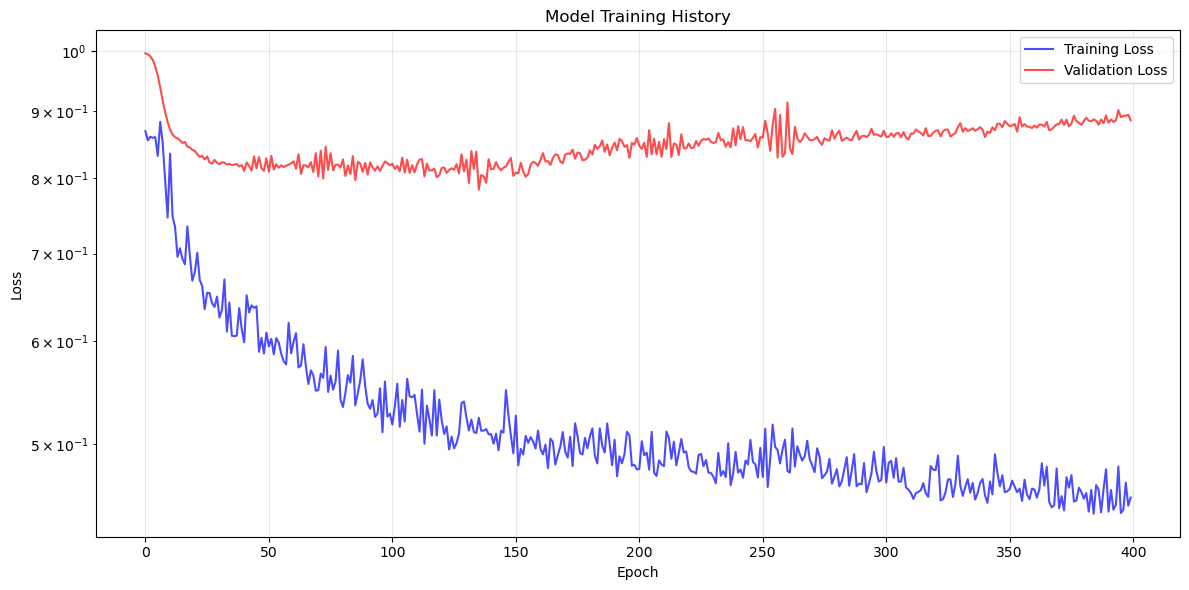

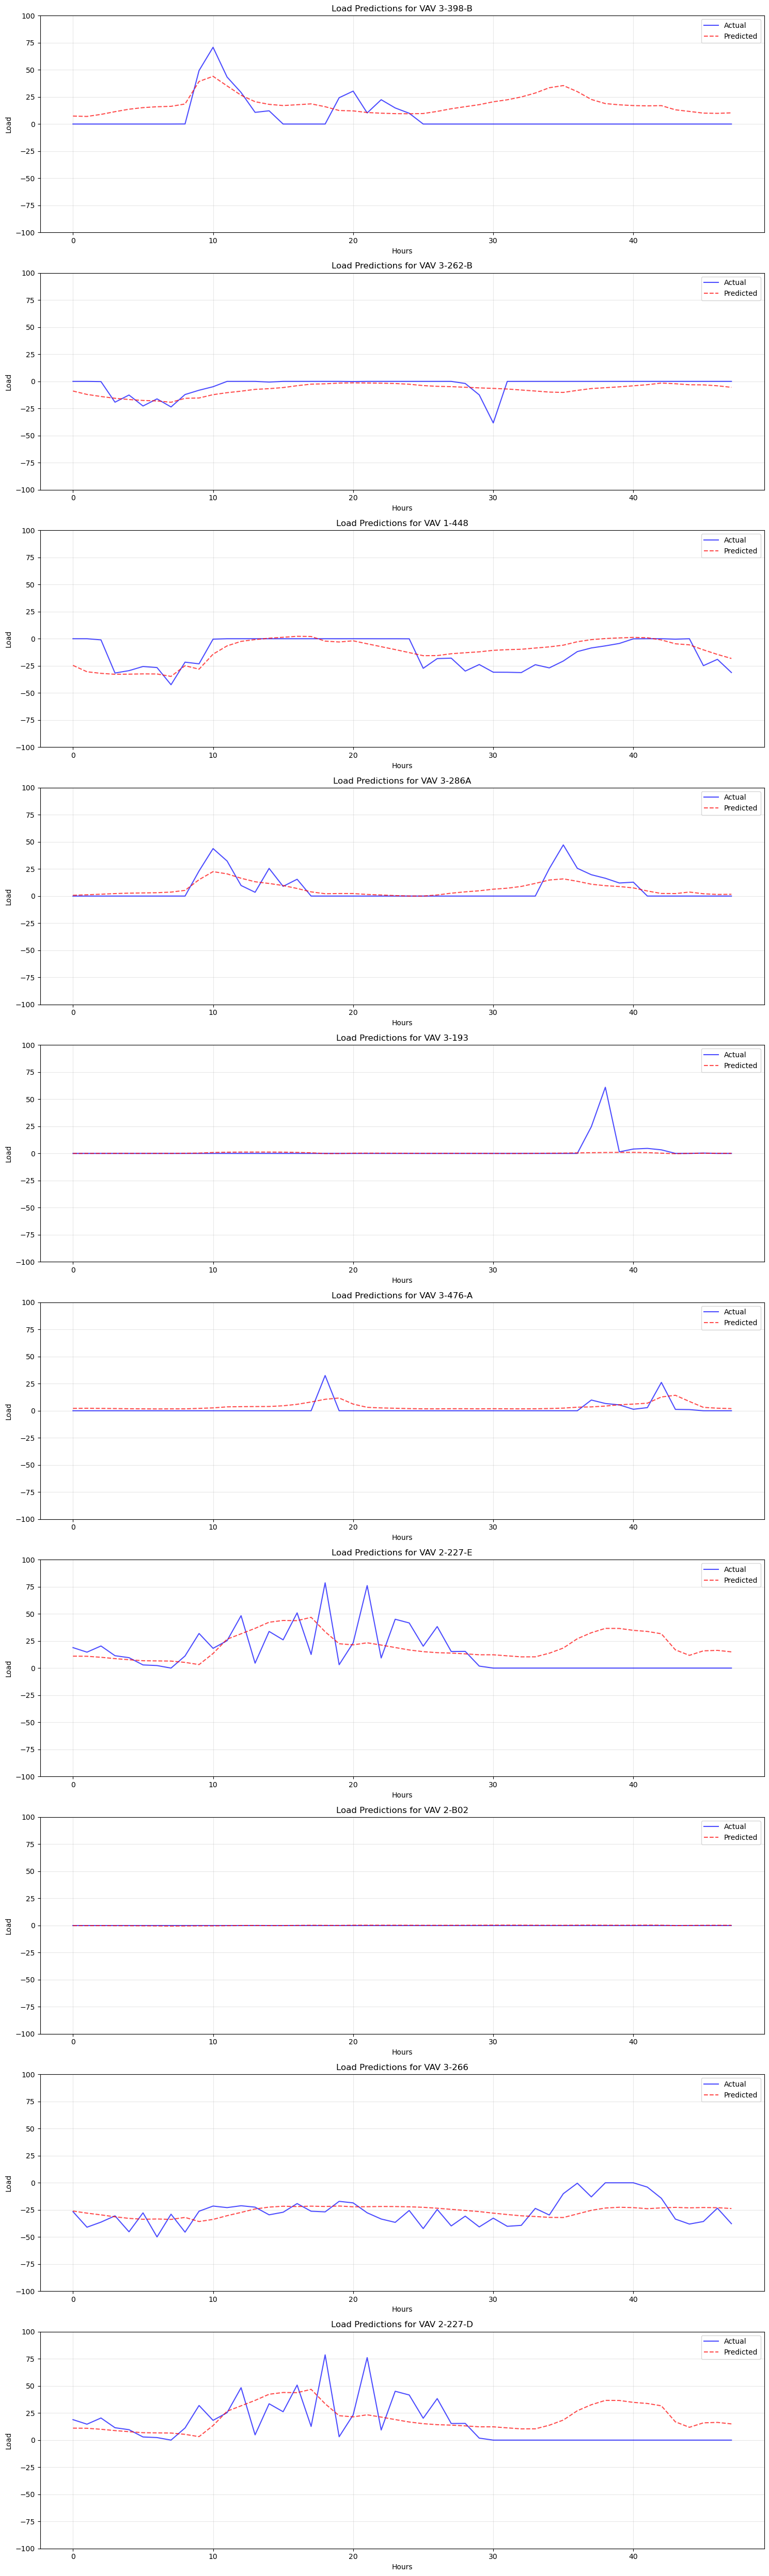

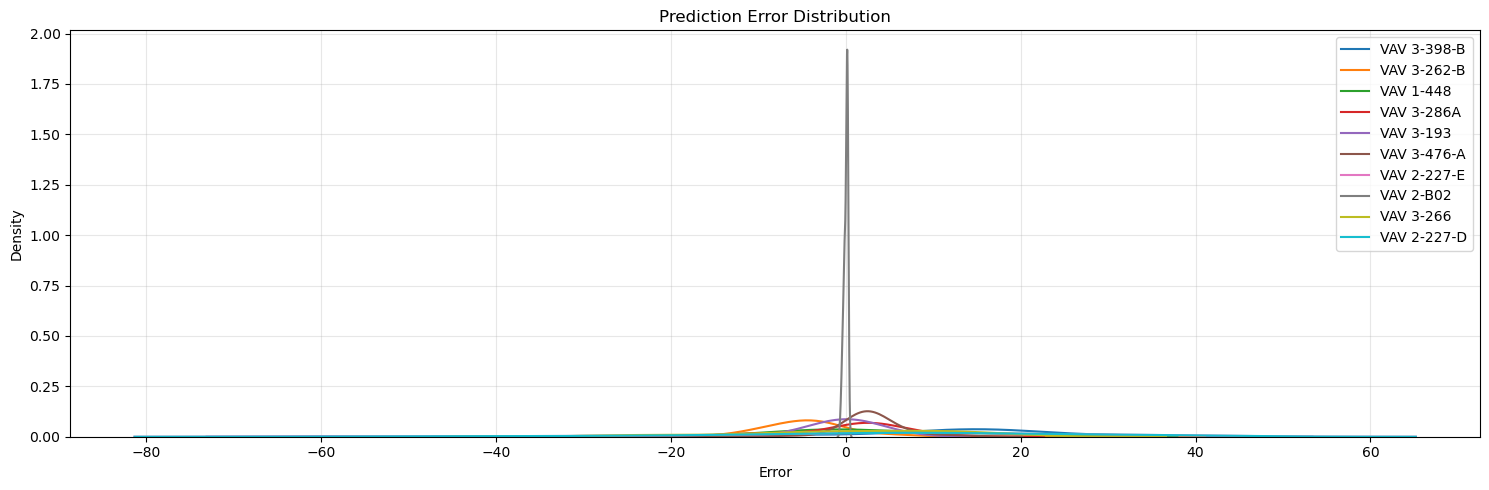


Prediction Metrics:
--------------------------------------------------

VAV 3-398-B:
MAPE: 8686440800.00%
RMSE: 16.95

VAV 3-262-B:
MAPE: 1649921100.00%
RMSE: 7.59

VAV 1-448:
MAPE: 1289976800.00%
RMSE: 11.79

VAV 3-286A:
MAPE: 7938776800.00%
RMSE: 7.88

VAV 3-193:
MAPE: 5884961200.00%
RMSE: 9.40

VAV 3-476-A:
MAPE: 2872454400.00%
RMSE: 5.54

VAV 2-227-E:
MAPE: 5675656400.00%
RMSE: 21.16

VAV 2-B02:
MAPE: 885873900.00%
RMSE: 0.22

VAV 3-266:
MAPE: 227216225.00%
RMSE: 12.17

VAV 2-227-D:
MAPE: 1924205400.00%
RMSE: 21.15


In [14]:
# Correct way to call visualize_results
visualize_results(
    model=model_dropout,
    dataset=val_dataset_dropout,  # The dataset object
    load_scaler=val_dataset_dropout.load_scaler,  # The actual scaler object
    train_losses=train_losses_dropout,
    val_losses=val_losses_dropout,
    zones_names=df.columns,
    sample_idx=0,
    n_samples=10,
)

# Compare models

In [10]:
models = [model, model_dropout]
train_losses_all = [train_losses, train_losses_dropout]
val_losses_all = [val_losses, val_losses_dropout]
model_names = ['No Dropout', 'Dropout']

NameError: name 'model' is not defined

Model 1
--------------------------------------------------
TerminalLoadPredictor(
  (loads_lstm): LSTM(382, 64, num_layers=2, batch_first=True)
  (weather_lstm): LSTM(6, 64, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=18336, bias=True)
  )
)


Model 2
--------------------------------------------------
TerminalLoadPredictor(
  (loads_lstm): LSTM(382, 64, num_layers=2, batch_first=True)
  (weather_lstm): LSTM(6, 64, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=18336, bias=True)
  )
)




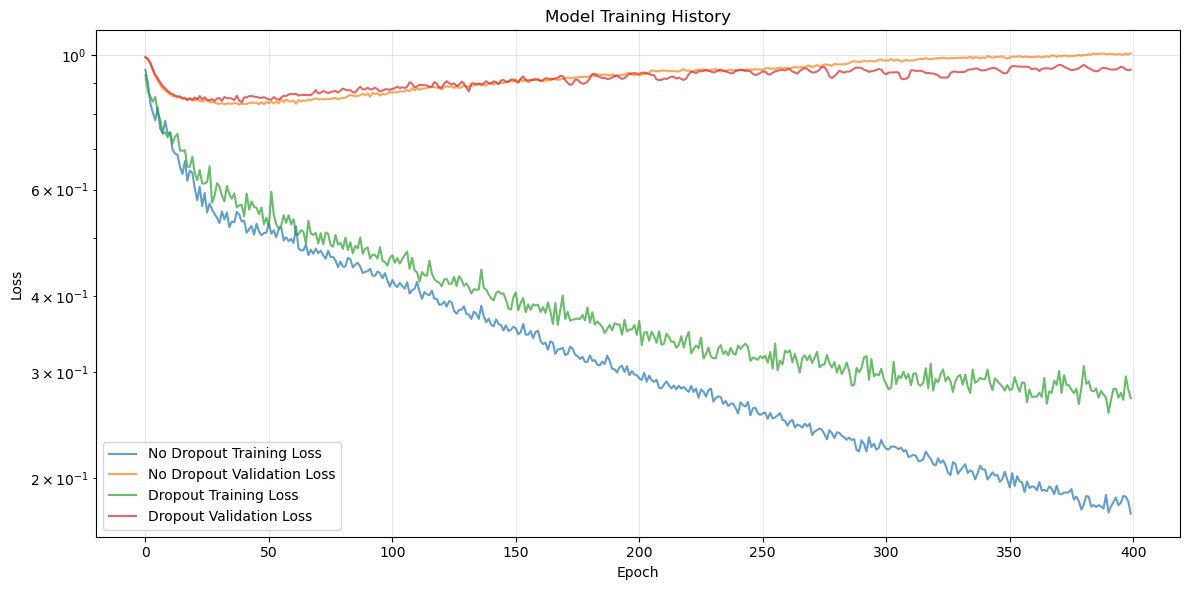

In [31]:
compare_results(
    models=models,
    train_losses=train_losses_all,
    val_losses=val_losses_all,
    model_names=model_names,
)

# Error Analysis

In [103]:
all_errors, all_predictions, all_targets = calculate_errors(model_dropout, val_dataset_dropout, val_dataset_dropout.load_scaler)

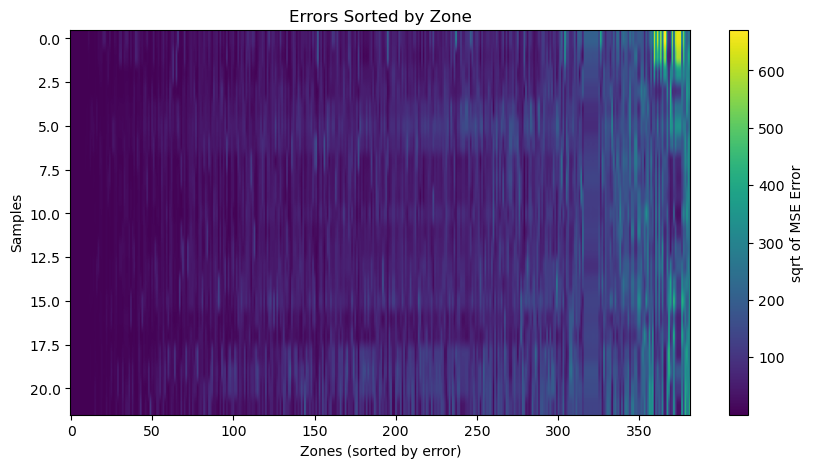

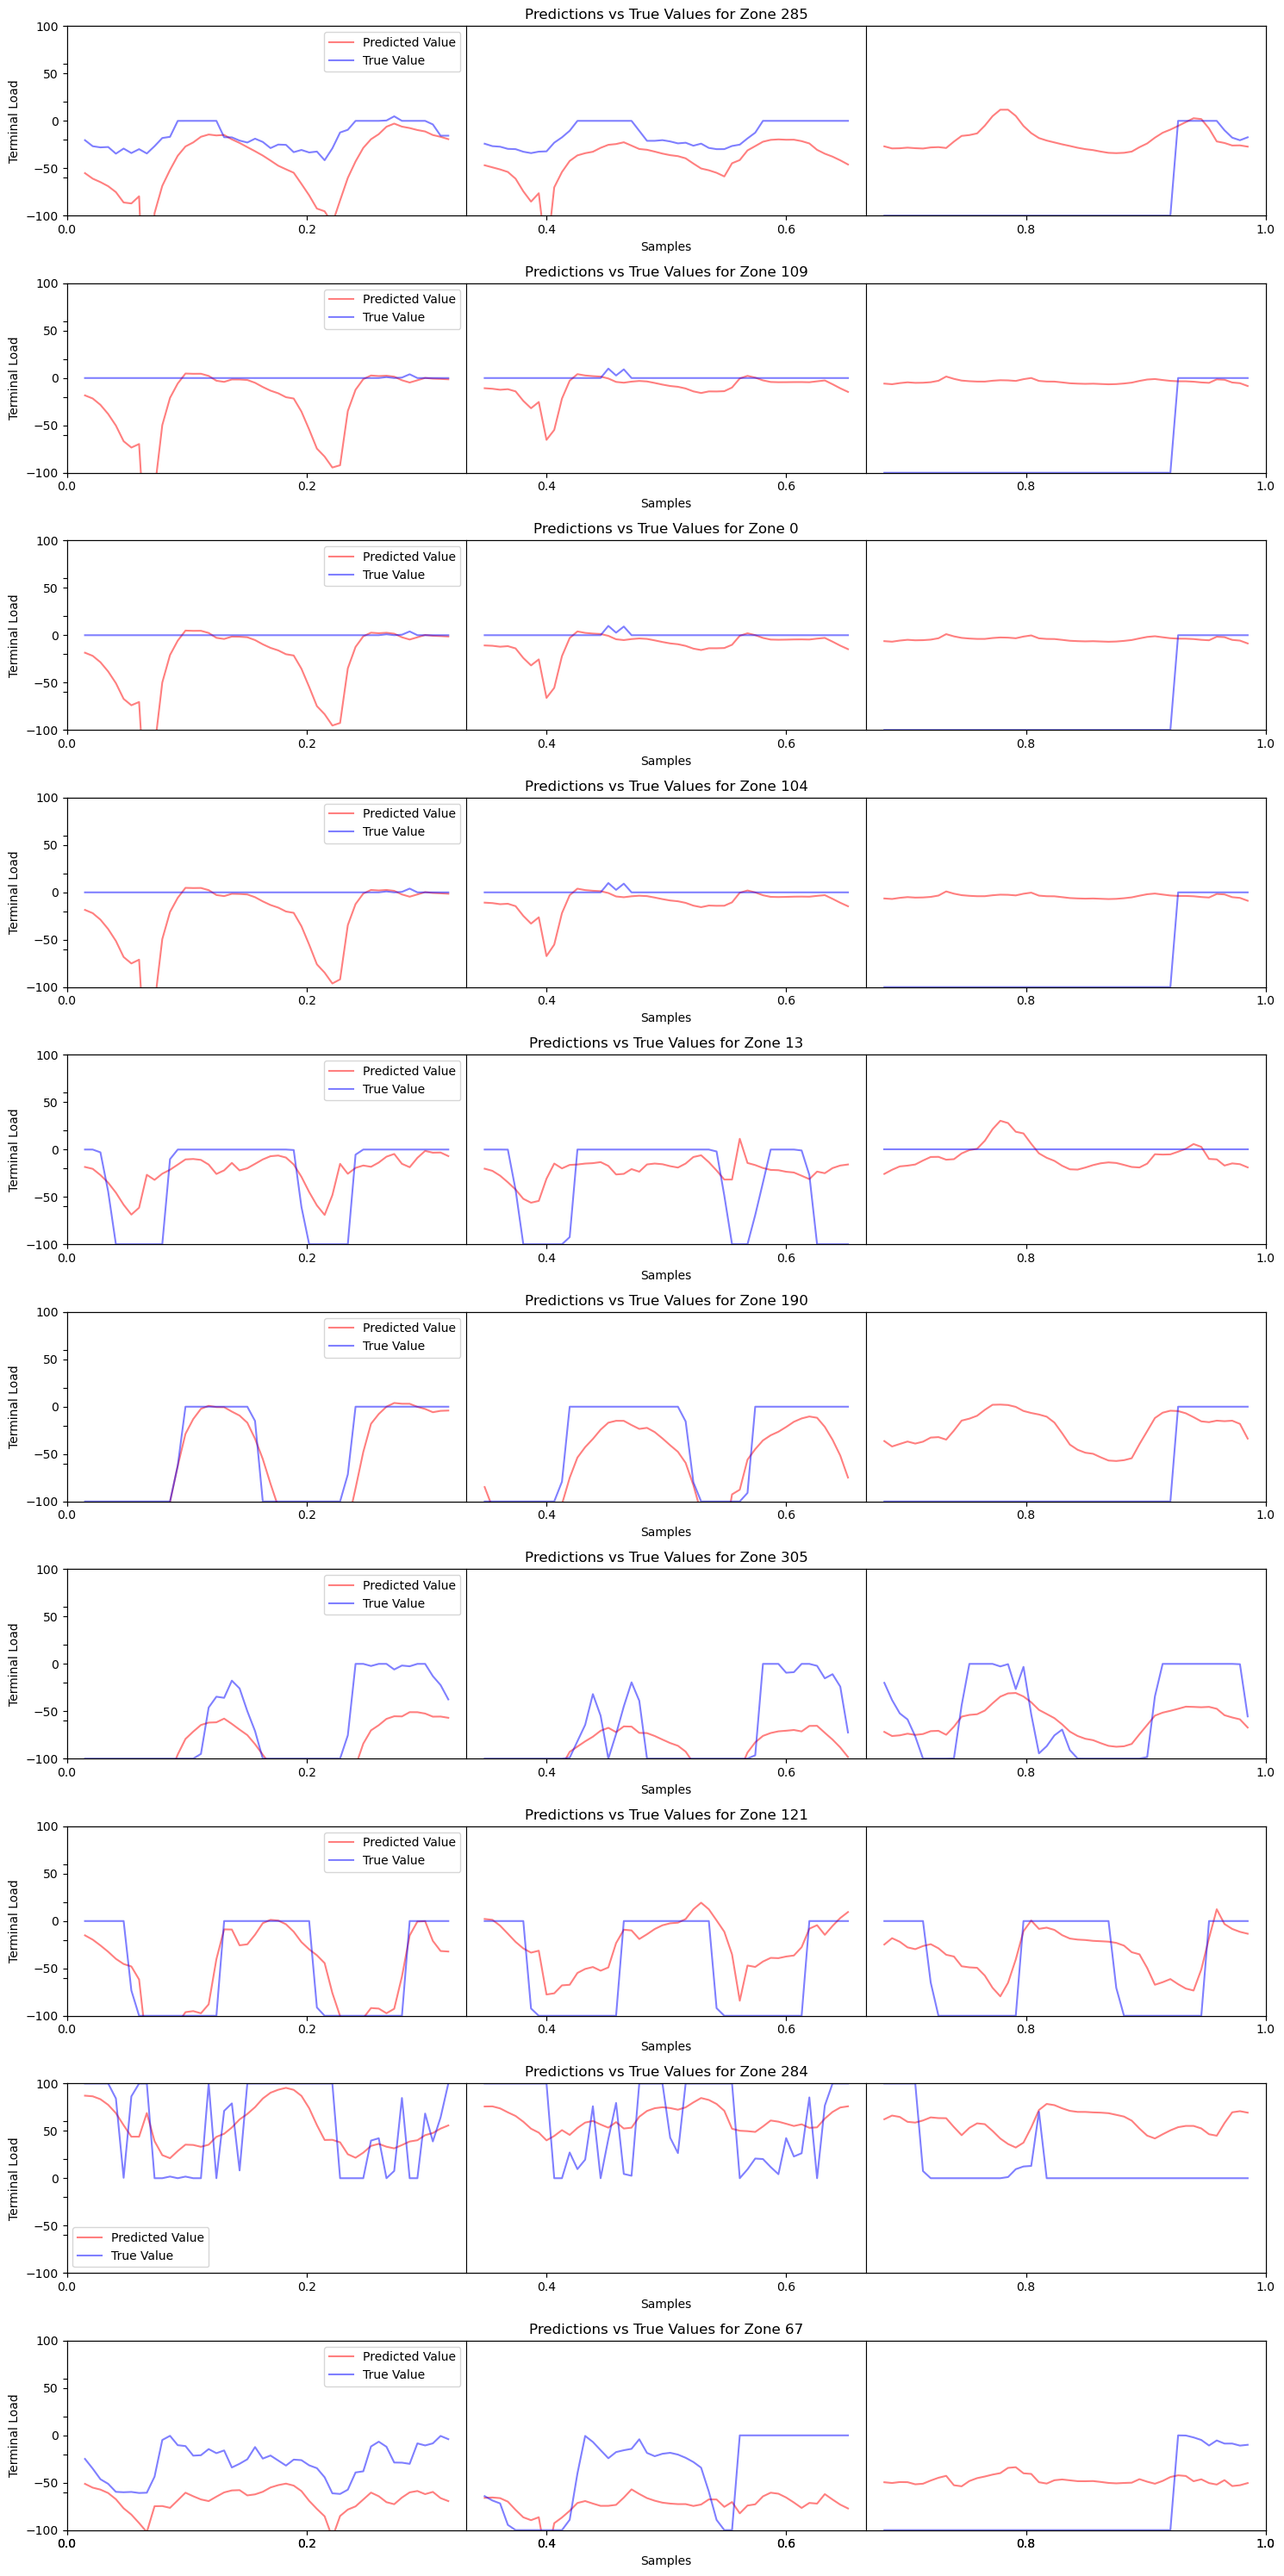

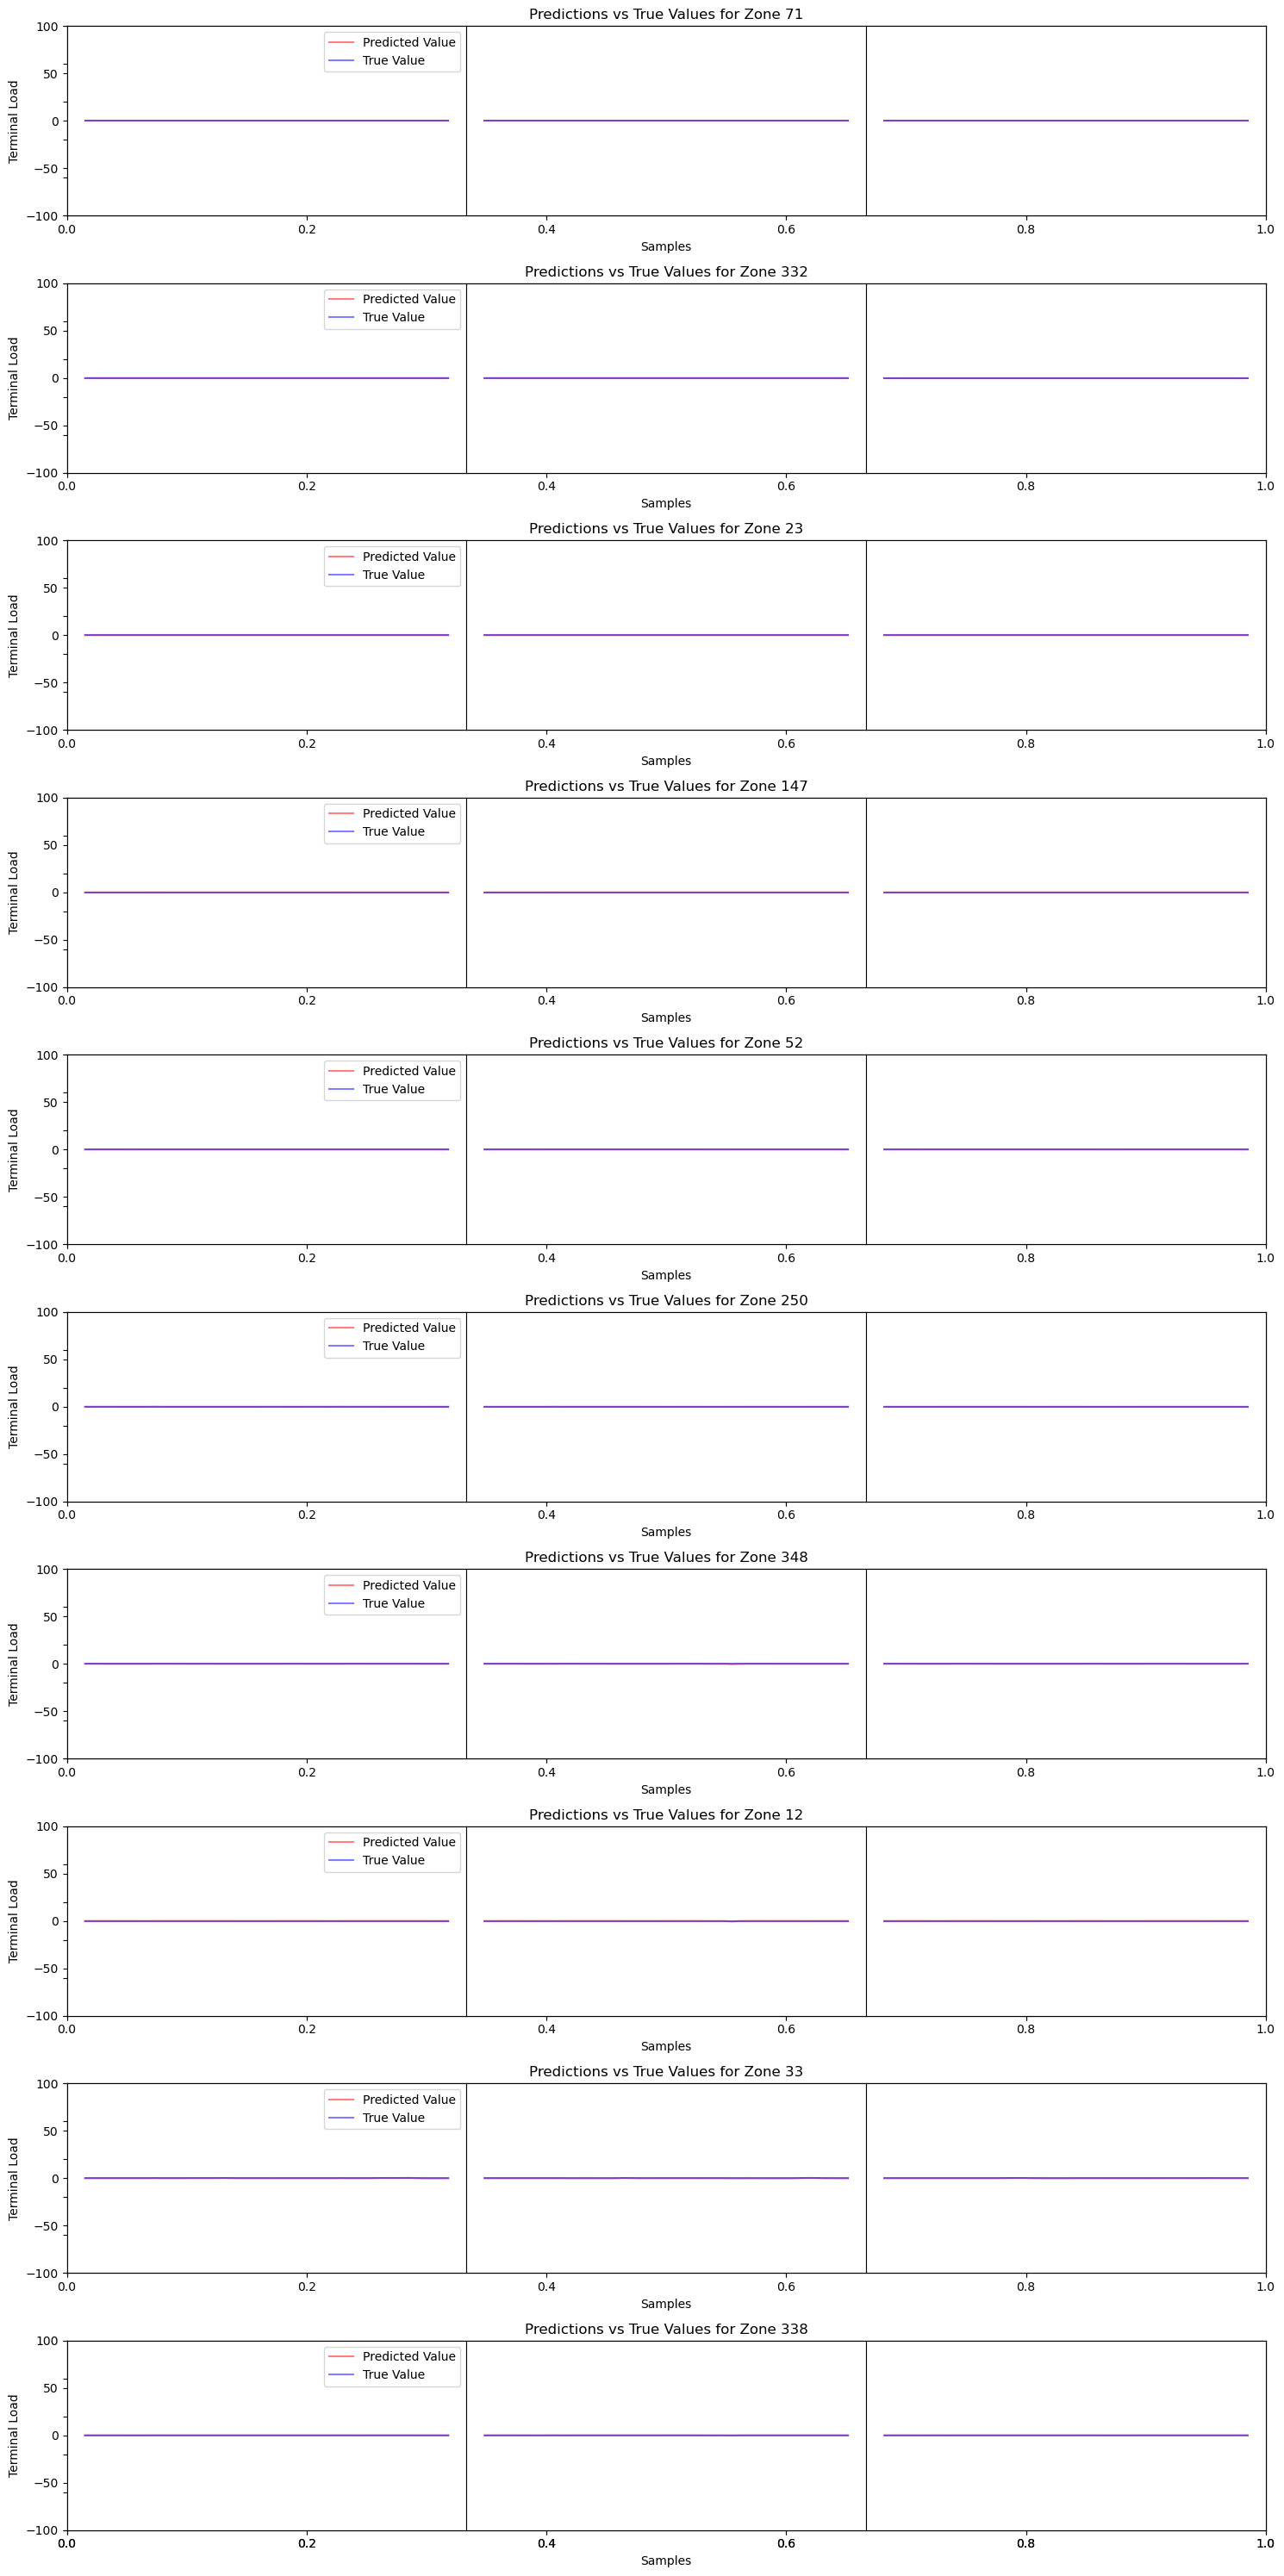

In [151]:
from viz import plot_dataset_error, plot_bad_samples_predictions

plot_dataset_error(all_errors)

plot_bad_samples_predictions(all_errors, all_predictions, all_targets, N_samples=3, N_zones=10)
plot_bad_samples_predictions(all_errors, all_predictions, all_targets, good_zones=True,N_samples=3, N_zones=10)